In [1]:
# Required libraries

import functions
from functions import *
from plot_functions import *
#from apply_ml import *
#import specific_funcs

In [2]:
# Loading the data - curated dataset

path_dataset = "C:/Users/natal/CSCI5922_NN/Lab1/motorcycle_brand_pred/data/all_bikez_curated.csv"
df = pd.read_csv(path_dataset)

type_str = ["Brand", "Model", "Category", "Engine cylinder", "Engine stroke", "Gearbox", "Fuel control", "Cooling system", "Transmission", "Front brakes", "Rear brakes", "Front suspension", "Rear suspension", "Color options"]

# Columns that need to have float type
type_float = ["Rating", "Displacement (ccm)", "Power (hp)", "Torque (Nm)", "Bore (mm)", "Stroke (mm)", "Fuel capacity (lts)", "Dry weight (kg)", "Wheelbase (mm)", "Seat height (mm)"]

# Columns with integer data type
type_int = ['Year']

df.loc[:, "Stroke (mm)"] = df.loc[:, "Stroke (mm)"].astype(str)
df.loc[:,'Stroke (mm)'] = df.loc[:,'Stroke (mm)'].apply(lambda x: x.replace(',',''))

datatypes = {k:np.float64 for k in type_float}
for k in type_int:
    datatypes[k] = np.int32

df = df.astype(datatypes) 

C:\Users\natal\AppData\Local\Temp\ipykernel_15944\3883859459.py:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_dataset)


In [3]:
# I want to see the counts for each motorcycle category to see if it's better to get rid of some brands that don'r have enough entries
df['Category'].value_counts()

Scooter                      6669
Sport                        5552
Enduro / offroad             4267
Custom / cruiser             4160
Naked bike                   3242
Allround                     3141
Classic                      1883
Super motard                 1634
Touring                      1573
ATV                          1481
Sport touring                1364
Cross / motocross            1243
Unspecified category          805
Trial                         558
Minibike, cross               529
Prototype / concept model     209
Minibike, sport               141
Speedway                       21
Name: Category, dtype: int64

In [4]:
# The problem to solve is classification so we drop the rows with 'unspecified category' for all exmalpes
# Getting rid of categories I'm not interested in

cat_unspec = df['Category'].isin(["Unspecified category", "Scooter","ATV", "Trial", "Minibike, cross", "Minibike, sport", "Speedway", "Prototype / concept model"])
df = df[~cat_unspec]
df['Category'].value_counts()

Sport                5552
Enduro / offroad     4267
Custom / cruiser     4160
Naked bike           3242
Allround             3141
Classic              1883
Super motard         1634
Touring              1573
Sport touring        1364
Cross / motocross    1243
Name: Category, dtype: int64

In [5]:
df.sample(10)

,Brand,Model,Year,Category,Rating,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke,...,Dry weight (kg),Wheelbase (mm),Seat height (mm),Front brakes,Rear brakes,Front tire,Rear tire,Front suspension,Rear suspension,Color options
24685,mv agusta,f4 rc,2018,Sport,NaN,998.0,212.0,115.0,In-line four,four-stroke,...,175.0,1430.0,830.0,"Double disc. Optional ABS. Brembo radial-type,...",Single disc. Optional ABS.,120/70-ZR17,200/55-ZR17,"Öhlins USD front fork, NIX 30 type with TIN co...","Öhlins progressive, TTX36 twin tube rear shock...",Red/white/green
36018,yamaha,star midnight warrior,2013,Custom / cruiser,3.6,1671.6,NaN,NaN,V2,four-stroke,...,NaN,1666.0,714.0,Double disc. Hydraulic.,Single disc. Hydraulic.,120/70-ZR18,200/50-ZR17,41mm KYB inverted fork,"Single shock, adjustable preload and rebound d...",Onyx
9461,gilera,saturno 500,1990,Classic,3.1,492.0,38.0,NaN,Single cylinder,four-stroke,...,NaN,NaN,NaN,Single disc,Single disc,110/70-17,140/70-17,NaN,NaN,NaN
5205,can-am,spyder f3-s,2016,Touring,3.8,1330.0,115.0,130.0,In-line three,four-stroke,...,386.0,1709.0,737.0,Double disc. ABS. Brembo,Single disc. ABS. Brembo,165/65-R15,225/50-R15,Double A-Arm with anti-roll bar. Gas charged s...,Swing arm with Sachs monoshock.,"Magnesium, white"
26856,quantya,track,2010,Enduro / offroad,NaN,NaN,16.1,31.5,Electric,Electric,...,88.5,1311.0,914.0,Single disc,Single disc,NaN,NaN,Marzocchi Shiver 40 mm,Sachs Single Shock,Black/white
15849,husqvarna,te125,2012,Enduro / offroad,3.0,124.5,NaN,NaN,Single cylinder,four-stroke,...,NaN,1450.0,930.0,Single disc. Fixed disc with hydraulic control...,Single disc. Fixed disc with hydraulic control...,90/90-21,120/80-18,40mm Paioli Upside-Down telescopic hydraulic f...,Sachs Progressive ´Soft Damp´ type with single...,Red/white/black
23202,moto guzzi,alce,1943,Allround,NaN,500.0,13.2,NaN,Single cylinder,four-stroke,...,179.0,1455.0,NaN,Expanding brake (drum brake),Expanding brake (drum brake),NaN,NaN,NaN,NaN,NaN
15843,husqvarna,te 610 enduro,1996,Enduro / offroad,3.4,577.0,55.0,NaN,Single cylinder,four-stroke,...,117.0,NaN,885.0,Single disc,Single disc,NaN,NaN,NaN,NaN,NaN
28647,suzuki,boulevard m109r b o s s,2019,Custom / cruiser,3.5,1783.0,125.0,160.0,V2,four-stroke,...,NaN,1710.0,705.0,Double disc. Dual piston,Single disc. Single piston,130/70-R18,240/40-R18,"Inverted telescopic, coil spring, oil damped","Link style, solo shock, coil spring, oil damped","Glass Sparkle Black/Candy Max Orange, Metallic..."
15567,husqvarna,fc 450,2022,Cross / motocross,NaN,449.9,63.0,NaN,Single cylinder,four-stroke,...,101.0,1485.0,940.0,Single disc. Brembo twin-piston floating calliper,Single disc. Brembo single-piston floating cal...,90/90-21,140/90-18,"WP XACT-USD, Ø 48 mm",WP XACT Monoshock with linkage,White/yellow/wblue


In [6]:
# Looking at brands
brands=list(df['Brand'].unique())
brands

['acabion',
 'ace',
 'adler',
 'adly',
 'aeon',
 'aermacchi',
 'ajp',
 'ajs',
 'alfer',
 'alligator',
 'allstate',
 'alphasports',
 'alta',
 'amazonas',
 'american eagle',
 'american ironhorse',
 'apc',
 'aprilia',
 'apsonic',
 'arch',
 'ardie',
 'ariel',
 'arlen ness',
 'arqin',
 'aspes',
 'atk',
 'atlas honda',
 'aurora',
 'avanturaa choppers',
 'avinton',
 'azel',
 'bajaj',
 'balkan',
 'baltmotors',
 'bamx',
 'baotian',
 'batavus',
 'beeline',
 'benelli',
 'bennche',
 'beta',
 'better',
 'big bear choppers',
 'big dog',
 'bimota',
 'bintelli',
 'black douglas',
 'blackburne',
 'blata',
 'bluroc',
 'bmc choppers',
 'bmw',
 'boom trikes',
 'borile',
 'boss hoss',
 'bourget',
 'brammo',
 'bridgestone',
 'britten',
 'brixton',
 'brough superior',
 'brudeli',
 'bsa',
 'buccimoto',
 'buell',
 'bullit',
 'bultaco',
 'cagiva',
 'california scooter',
 'can-am',
 'cargobike',
 'casal',
 'caterham',
 'ccm',
 'cf moto',
 'ch racing',
 'chang-jiang',
 'cheetah',
 'cheney',
 'christini',
 'clarke

In [7]:
guzzi = df[df['Brand'] == "moto guzzi"]
list(guzzi["Model"].unique())

['1000 daytona injection',
 '1000 quota injection',
 '1000 s',
 '1100 california ev',
 '1100 sport',
 '1100 sport corsa',
 '1200 sport',
 '1200 sport 4v',
 '1200 sport abs',
 '1200 sport rosso corsa',
 '250 ts',
 '254',
 '500 sahara',
 '650 gt',
 '750 nevada club',
 '750 s',
 '750 s 3',
 '850 california',
 '850 le mans',
 '850 le mans 111',
 '850 le mans ii',
 '850 le mans iii',
 '850 t',
 '850 t 3',
 '850 t 3 california',
 '850 t 4',
 '850 t 5',
 '850t',
 '940 custom',
 'alce',
 'audace',
 'audace carbon',
 'audace carbon 1400',
 'bellagio',
 'bellagio aquila nera',
 'breva 1100',
 'breva 1100 abs',
 'breva 1200',
 'breva 1200 abs',
 'breva 1200 sport',
 'breva 750',
 'breva 750 ie',
 'breva 850',
 'breva v 1100',
 'breva v 750 i.e.',
 'breva v750 ie',
 'california 1100',
 'california 1100 ev',
 'california 1100 f',
 'california 1100 i',
 'california 1100 injection',
 'california 1100 special',
 'california 1400 custom',
 'california 1400 touring',
 'california 1400 touring se',
 'cal

<AxesSubplot:ylabel='Category'>

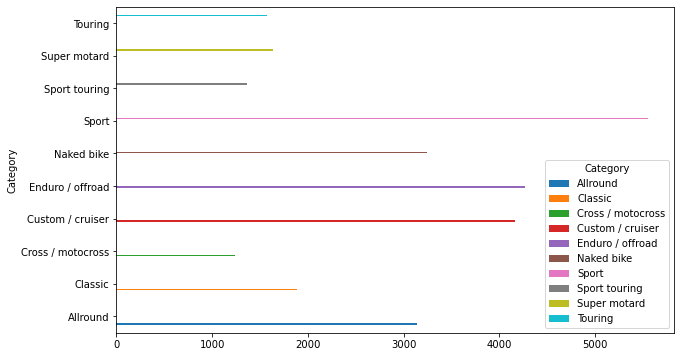

In [8]:
df.groupby('Category').Category.value_counts().unstack().plot.barh(style='ggplot', figsize=(10,6))

In [9]:
# Getting rid of skewed data and data not needed to classification task

col_to_drop = ["Brand", "Model", "Rating", "Color options"]
dfc = df.drop(columns=col_to_drop)

# Taking only rows that have full information about an example
conditions = [~dfc[col].isnull() for col in dfc.columns]
cond = conditions[0]
for c in conditions[1:]:
    cond = cond & c
new_rows = cond[cond==True]
df_full = dfc.loc[new_rows.index, :]

In [10]:
print(len(df), len(dfc), len(df_full))

28059 28059 2798


In [11]:
df_full.groupby('Category').count()

,Year,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke,Gearbox,Bore (mm),Stroke (mm),Fuel capacity (lts),...,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm),Front brakes,Rear brakes,Front tire,Rear tire,Front suspension,Rear suspension
Category,,,,,,,,,,,,,,,,,,,,,
Allround,229,229,229,229,229,229,229,229,229,229,...,229,229,229,229,229,229,229,229,229,229
Classic,162,162,162,162,162,162,162,162,162,162,...,162,162,162,162,162,162,162,162,162,162
Cross / motocross,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Custom / cruiser,351,351,351,351,351,351,351,351,351,351,...,351,351,351,351,351,351,351,351,351,351
Enduro / offroad,211,211,211,211,211,211,211,211,211,211,...,211,211,211,211,211,211,211,211,211,211
Naked bike,704,704,704,704,704,704,704,704,704,704,...,704,704,704,704,704,704,704,704,704,704
Sport,591,591,591,591,591,591,591,591,591,591,...,591,591,591,591,591,591,591,591,591,591
Sport touring,123,123,123,123,123,123,123,123,123,123,...,123,123,123,123,123,123,123,123,123,123
Super motard,208,208,208,208,208,208,208,208,208,208,...,208,208,208,208,208,208,208,208,208,208


<AxesSubplot:ylabel='Category'>

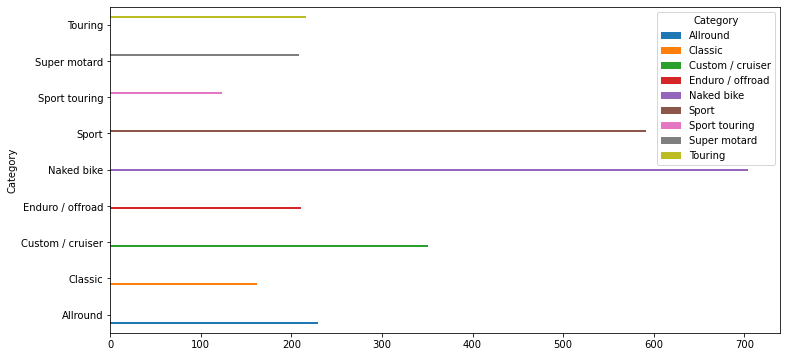

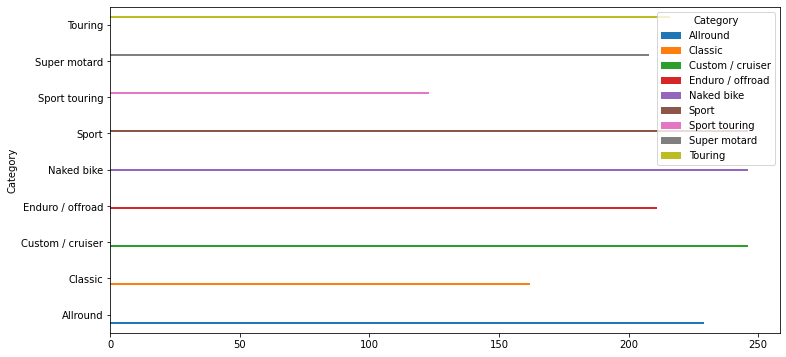

In [12]:
# Further cleaning the data to balance more different categories

# Drop categories with less than 120 entries - 1 entry
cat_low = df_full['Category'].isin(["Cross / motocross"])
df_full = df_full[~cat_low]
df_full.groupby('Category').Category.value_counts().unstack().plot.barh(style='ggplot', figsize=(12,6))

# Get random 300 examples for other categoreis
lowest_count = df_full.groupby('Category').count().max(axis=1).min()
n_random_rows = lowest_count * 2
row_blocks = []
for cat in df_full.groupby('Category').count().index:
    row_blocks.append(random_rows(df_full[df_full['Category']==cat], n_random_rows))
df_selected = pd.concat(row_blocks)
df_selected.sort_index(inplace=True)
df_selected.groupby('Category').Category.value_counts().unstack().plot.barh(style='ggplot', figsize=(12,6))

In [13]:
df_selected.sample(5)

,Year,Category,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke,Gearbox,Bore (mm),Stroke (mm),...,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm),Front brakes,Rear brakes,Front tire,Rear tire,Front suspension,Rear suspension
410,2020,Enduro / offroad,600.0,48.0,58.0,Single cylinder,four-stroke,6-speed,100.0,76.4,...,Chain,155.0,1540.0,920.0,Single disc. 2-piston calipers,Single disc. Single-piston caliper,90/90-21,140/80-18,ZF Sachs Ø48mm fully adjustable,ZF Sachs progressive system with reservatory f...
1901,2015,Sport,647.0,79.0,66.9,V2,four-stroke,6-speed,81.5,62.0,...,Chain,204.1,1435.0,831.0,"Double disc. Floating rotor, 2 pistons calipers","Single disc. Floating rotor, 2 pistons calipers",120/60-ZR17,160/60-ZR17,"Upside down Telescopic (Compression, Rebound ...",Swing arm with Progressive linkage Hydraulic ...
21406,2016,Naked bike,124.1,13.0,9.8,Single cylinder,four-stroke,5-speed,56.5,49.5,...,Chain,132.0,1355.0,800.0,Single disc,Single disc,110/80-17,140/70-17,Telescopic fork,Single swing
10380,2003,Custom / cruiser,1449.0,67.0,106.0,V2,four-stroke,5-speed,95.3,101.6,...,Belt,293.0,1665.0,738.0,Single disc. Four-piston calipers.,Single disc. Four-piston calipers.,MH90-21,160/70-B17,49 mm w/polished aluminum fork triple clamp an...,"Coil-over shock , 104mm wheel travel"
12018,1972,Classic,49.5,4.8,3.7,Single cylinder,four-stroke,3-speed,39.0,41.4,...,Chain,69.0,1180.0,760.0,Expanding brake (drum brake). Cam operated dru...,Expanding brake (drum brake). Cam operated dru...,2.25´-17´,2.25´-17´,Leading link,Twin shock swingarm


In [14]:
# The classification task is to predict a category so this will be gold labels

labels = df_full.loc[:, 'Category']
unique_labels=labels.unique()

# One hot encoding for labels
num_label_dict = {x:y for (x,y) in zip(range(len(unique_labels)), unique_labels)}
label_num_dict = {y:x for (x,y) in num_label_dict.items()}
# Every categor gets a number

print(num_label_dict)
print(label_num_dict)
num_labels = labels.apply(lambda a: label_num_dict[a])
binary_labels, names = binarize_categorical(labels)

{0: 'Super motard', 1: 'Enduro / offroad', 2: 'Sport', 3: 'Allround', 4: 'Classic', 5: 'Sport touring', 6: 'Naked bike', 7: 'Custom / cruiser', 8: 'Touring'}
{'Super motard': 0, 'Enduro / offroad': 1, 'Sport': 2, 'Allround': 3, 'Classic': 4, 'Sport touring': 5, 'Naked bike': 6, 'Custom / cruiser': 7, 'Touring': 8}


In [15]:
# Preparing the features

numerical_f = ['Year', 'Displacement (ccm)', 'Power (hp)', 'Torque (Nm)',
              'Bore (mm)', 'Stroke (mm)', 'Fuel capacity (lts)',
              'Dry weight (kg)', 'Wheelbase (mm)', 'Seat height (mm)']
categorical_f = [feature for feature in df_selected.columns if feature not in numerical_f and feature != 'Category']

In [16]:
df_cat = df_selected[categorical_f]
df_num = df_selected[numerical_f]

In [17]:
# Scaling features to have mean 0 and sd 1

from sklearn.preprocessing import StandardScaler
df_num_feat = df_num.copy()
df_num_feat.loc[:,:] = StandardScaler().fit(df_num).transform(df_num)

Text(0.5, 1.0, 'Correlation matrix')

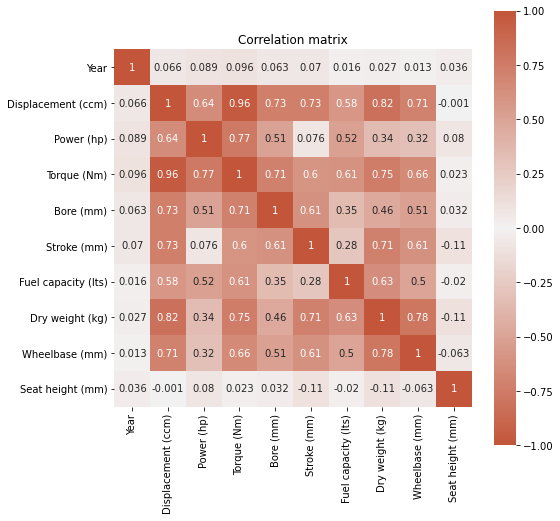

In [18]:
# Correlation matrix of different features

corr_matrix = df_num_feat.corr()
my_cmap = sns.diverging_palette(20, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(8,8))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, square=True, cmap=my_cmap, ax=ax)
heatmap.set_title('Correlation matrix')

In [19]:
# Cleaning the categorical data as features

column_names = ""
for name in df_cat.columns:
    column_names+=name+", "
column_names = column_names.strip(', ')
column_names

'Engine cylinder, Engine stroke, Gearbox, Fuel system, Fuel control, Cooling system, Transmission type, Front brakes, Rear brakes, Front tire, Rear tire, Front suspension, Rear suspension'

In [20]:
prev_columns = []

# Helper function for engine cylinders
df_cat['n_cylinders'] = df_cat.loc[:,'Engine cylinder'].apply(n_cylinders)
prev_columns.append('Engine cylinders')

sorted(df_cat['n_cylinders'].unique())

C:\Users\natal\AppData\Local\Temp\ipykernel_15944\3239003444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['n_cylinders'] = df_cat.loc[:,'Engine cylinder'].apply(n_cylinders)


[1, 2, 3, 4, 6]

In [25]:
# Binarization of the Engine stroke feature
for col_name in df_cat['Engine stroke'].unique():
    if 'four' in col_name and 'stroke' in col_name:
        fourstroke_name = col_name
df_cat.loc[:,'Engine stroke'] = df_cat.loc[:,'Engine stroke'].replace({'Diesel':fourstroke_name})
df_cat = feature_to_binary(df_cat, 'Engine stroke')

C:\Users\natal\AppData\Local\Temp\ipykernel_15944\2385019920.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.loc[:,'Engine stroke'] = df_cat.loc[:,'Engine stroke'].replace({'Diesel':fourstroke_name})
c:\Users\natal\CSCI5922_NN\Lab1\motorcycle_brand_pred\scripts\functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,names[0]] = bin_array.T


In [ ]:
# Fuel system feature

